In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt    

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Viplav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
use_colomns = ['airline_sentiment', 'text', 'airline']

dataframe = pd.read_csv('Tweets.csv', usecols = use_colomns)

dataframe.head()

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...


In [3]:
pd.isnull(dataframe).sum()

airline_sentiment    0
airline              0
text                 0
dtype: int64

In [4]:
stop_words = stopwords.words('english')

dataframe['text_without_stopwords'] = dataframe['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

countVect = CountVectorizer(min_df= 10)

binaryVector = countVect.fit_transform(dataframe.text_without_stopwords)

In [5]:
y = dataframe.airline_sentiment
X = binaryVector

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=123)

print([x.shape for x in [train_X, test_X, train_y, test_y]])

[(10980, 1872), (3660, 1872), (10980,), (3660,)]


In [6]:
naive_bayes = MultinomialNB()
naive_bayes.fit(train_X, train_y)

predicted = naive_bayes.predict(test_X)
accuracy_score = metrics.accuracy_score(predicted, test_y)
confusion_count = metrics.confusion_matrix(predicted, test_y)


print('Accuracy: ',accuracy_score,'\n')
print('Confusion Matrix:\n',confusion_count)

Accuracy:  0.7808743169398907 

Confusion Matrix:
 [[2015  304   76]
 [ 186  430   60]
 [ 111   65  413]]


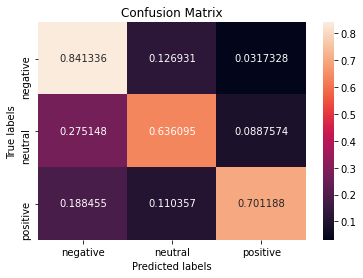

In [7]:
confusion = metrics.confusion_matrix(predicted, test_y, normalize = 'true')

axis= plt.subplot()
sns.heatmap(confusion, annot=True, fmt='g', ax=axis);  

axis.set_xlabel('Predicted labels');
axis.set_ylabel('True labels'); 
axis.set_title('Confusion Matrix'); 
axis.xaxis.set_ticklabels(['negative', 'neutral', 'positive']); 
axis.yaxis.set_ticklabels(['negative', 'neutral', 'positive']);

In [8]:
neg_class_prob_sorted = naive_bayes.feature_log_prob_[0, :].argsort()[::-1]
pos_class_prob_sorted = naive_bayes.feature_log_prob_[1, :].argsort()[::-1]

print('Negative words:\n', np.take(countVect.get_feature_names(), neg_class_prob_sorted[:25]))
print('\nPositive words:\n', np.take(countVect.get_feature_names(), pos_class_prob_sorted[:25]))

Negative words:
 ['united' 'flight' 'usairways' 'americanair' 'southwestair' 'jetblue'
 'get' 'cancelled' 'service' 'hours' 'hold' 'can' 'customer' 'help' 'time'
 'plane' 'amp' 'delayed' 'still' 'you' 'us' 'co' 'one' 'call' 'http']

Positive words:
 ['jetblue' 'united' 'southwestair' 'flight' 'co' 'http' 'americanair'
 'usairways' 'get' 'please' 'flights' 'virginamerica' 'need' 'thanks'
 'help' 'can' 'dm' 'would' 'know' 'it' 'our' 'fleek' 'fleet' 'us' 'you']


In [9]:
pivot = dataframe.pivot_table(index=['airline'], columns='airline_sentiment', aggfunc='size', fill_value=0)
pivot

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


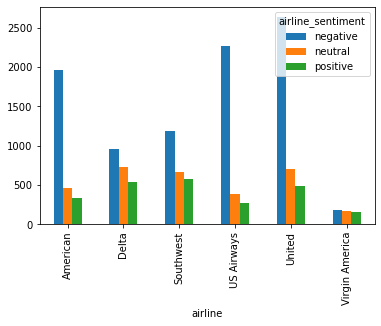

In [10]:
pivot.plot(kind='bar')
plt.show()